# Capstone Project: Honey Label Prediction

# DTSC 691: Default Machine Learning Project

# Name: Dushyant Nayak



# Introduction


Living a healthy lifestyle is the most desired as well as the most challenging goal of the modern
age.

People are becoming more aware about the physical activities for fitness, proactive health checkup and food intake. Due to transparencies most of these are in control of the individual except the quality of food. To give an example, we know that protein is a vital macronutrient and there are a variety of protein sources available in the market. A few dairy products such as cottage cheese, Greek Yogurt etc. are great sources of protein. 

But how do we know that the label provided in the food product is authentic? Egg is a very good source of protein but there are many brands, types of eggs available in the market. Do we know what the difference is?
Which one is better than the other?

Another example is honey, which is a very rich antioxidant, helps in losing weight and also found
to be improving heart health. Health benefits of honey are not limited to a few.
The United States has purchased about 666.5 million U.S. dollars of honey from other countries
in 2021.

In the market, adulterated honey is highly prevalent, and many sorts of adulterations are being
detected.The demand for honey is increasing in the world which is attracting honey adulteration too.

There are adverse impacts if honey is adulterated such as causing diabetes and other conditions.
Due to this, techniques for food authentication are becoming more and more widespread.

Food authentication is the analytical procedure to confirm that a food product complies with the
information on its label.


In this project, I will examine honey datasets (honeydata.rdata) from food authenticity investigations that uses infrared (NIR) spectroscopy. 

NIR produces data of chemical bonding within the food item and each sample produces different wavelengths which measures absorption of light with wavelengths between 780 and 2500 nm.

The characteristics of transflectance spectra recorded over a variety of wavelengths make up the NIR datasets. 

In this research we will seek to ascertain whether labels of the food samples are accurate. 

This corresponds to a multi-category supervised classification problem, where the known and predicted labels are compared after a classifier has been trained on a batch of data. Additional quality testing can be performed on the samples that are found to have possibly erroneous labels.


## Data Description

As part of the journey, we are going to analyze honey datasets from food authenticity investigations that were generated through infrared (NIR) spectroscopy.

Honey samples (labeled as pure or adulterated by different adulterants).

Spectra of 478 samples of pure and contaminated honey were recorded over 700 wavelengths in the honey data.
The samples of adulterated honey are then classified into four types according to the type of adulteration: Fully-inverted beet syrup (BI), Fructose: glucose combinations (FG) and High fructose corn syrup (HFCS).

In the dataset, 700 explanatory variables which are predictors. More precisely, the actual predictors will be the components obtained after feature reduction. The outcome will be the class.

### Data Acquisition: 

Dataset (honeydata.rdata) was acquired from the researcher over email along with the approval to use it for my project. 

Dataset file (honeydata.rdata) will be available in Github and will be shared if needed.
Honey samples (labeled as pure or adulterated by different adulterants).

In [9]:

# Importing all necessary Libraries
! pip install pyreadr
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, KernelCenterer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.utils import extmath
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics 
# from google.colab import files


### Data Preparation and Cleaning as well as Exploratory Data Analysis

Going to prepare, clean and explore every aspect of honey data and visualizing it using the plot.


In [10]:
# result=pyreadr.read_r('honeydata.rdata')

# file = files.upload()


In [42]:
# result=pyreadr.read_r('honeydata.rdata')

In [43]:
# Preparing data in row/column format
# result.keys() # To know the keys
honey = result["honey"]
label = result["label"]
label_full = result["label.full"]
Random_seed= result[".Random.seed"]

honey_label=pd.concat([honey, label], axis=1)

# honeydata is Dataframe stores complete data in row/column format

honeydata=pd.concat([honey_label, label_full], axis=1)

honeydata["label"]=honeydata["label"].map(str.upper)
honeydata["label.full"]=honeydata["label.full"].map(str.upper)
honeydata=honeydata.reset_index(drop=True)
# honey_no_labels is Dataframe stores data without labels.
label_full = honeydata["label.full"]
honey_no_labels=honeydata.iloc[ :,:700]
honey_no_labels
honeydata.to_csv('honeydata.csv')


In [13]:
honeydata.shape

(478, 702)

In [14]:
honeydata.head(2)

,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,2484,2486,2488,2490,2492,2494,2496,2498,label,label.full
0,0.045821,0.045919,0.046006,0.046081,0.046127,0.046154,0.046193,0.046263,0.046355,0.046462,...,1.241331,1.246504,1.250619,1.253306,1.254781,1.255183,1.254414,1.252608,PURE,PURE
1,0.046689,0.046794,0.046888,0.046968,0.047018,0.047048,0.047092,0.047168,0.047267,0.047380,...,1.241048,1.246333,1.250335,1.253182,1.254740,1.255117,1.254655,1.253190,PURE,PURE


In [15]:
# Shows last few columns including labels
honeydata[honeydata['label.full']=='PURE'].iloc[:,695:].head()






,2490,2492,2494,2496,2498,label,label.full
0,1.253306,1.254781,1.255183,1.254414,1.252608,PURE,PURE
1,1.253182,1.254740,1.255117,1.254655,1.253190,PURE,PURE
2,1.252433,1.253965,1.254278,1.253536,1.251884,PURE,PURE
3,1.257610,1.259046,1.259366,1.258606,1.257072,PURE,PURE
4,1.256330,1.257720,1.258104,1.257498,1.255944,PURE,PURE


In [16]:
honey_no_labels.shape


(478, 700)

In [17]:
honey_no_labels.head(2)

,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,0.045821,0.045919,0.046006,0.046081,0.046127,0.046154,0.046193,0.046263,0.046355,0.046462,...,1.227317,1.234959,1.241331,1.246504,1.250619,1.253306,1.254781,1.255183,1.254414,1.252608
1,0.046689,0.046794,0.046888,0.046968,0.047018,0.047048,0.047092,0.047168,0.047267,0.047380,...,1.226857,1.234513,1.241048,1.246333,1.250335,1.253182,1.254740,1.255117,1.254655,1.253190


In [18]:

nrows=honey_no_labels.shape[0] # no of rows
ncols=honey_no_labels.shape[1]# no of cols
labels_only=honeydata.iloc[:,-1] # Only Labels
labels_only

0      PURE
1      PURE
2      PURE
3      PURE
4      PURE
       ... 
473    HFCS
474    HFCS
475    HFCS
476    HFCS
477    HFCS
Name: label.full, Length: 478, dtype: category
Categories (4, object): ['BI', 'FG', 'HFCS', 'PURE']

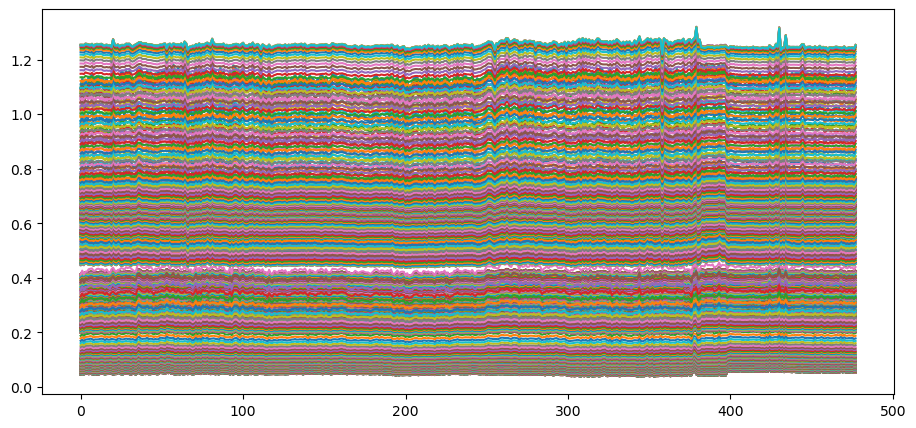

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,5)
N = range(nrows)
for i in range(ncols):
    plt.plot(N, honey_no_labels.iloc[:,i])

plt.show()

In [20]:

labels_only.unique()


['PURE', 'FG', 'BI', 'HFCS']
Categories (4, object): ['BI', 'FG', 'HFCS', 'PURE']

## ML Model Training

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(honey_no_labels, labels_only,test_size=0.20,stratify=labels_only,random_state=1)

X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)




In [22]:
labels_only.value_counts()

FG      225
PURE    157
BI       56
HFCS     40
Name: label.full, dtype: int64

In [23]:
y_train.value_counts()

FG      180
PURE    125
BI       45
HFCS     32
Name: label.full, dtype: int64

In [24]:
y_test.unique()

['PURE', 'FG', 'HFCS', 'BI']
Categories (4, object): ['BI', 'FG', 'HFCS', 'PURE']

In [25]:
y_test.value_counts()

FG      45
PURE    32
BI      11
HFCS     8
Name: label.full, dtype: int64

#### PCA (Principal Component Analyzes) 

The datasets have high dimensions and are highly correlated to neighboring features, with the number of features (p) exceeding the number of instances (n), p<<n. Principal Components Analysis (PCA) for pre-processing phase seems to be typical methods for dimension reduction in this data.

Transforming the data to it's 4 principal components

In [26]:
# Fitting and transforming training but only transforming test dataset
pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
# X_test_pca=pca.fit_transform(X_test)
# Generating Explained Variance Ratio and singular values
explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

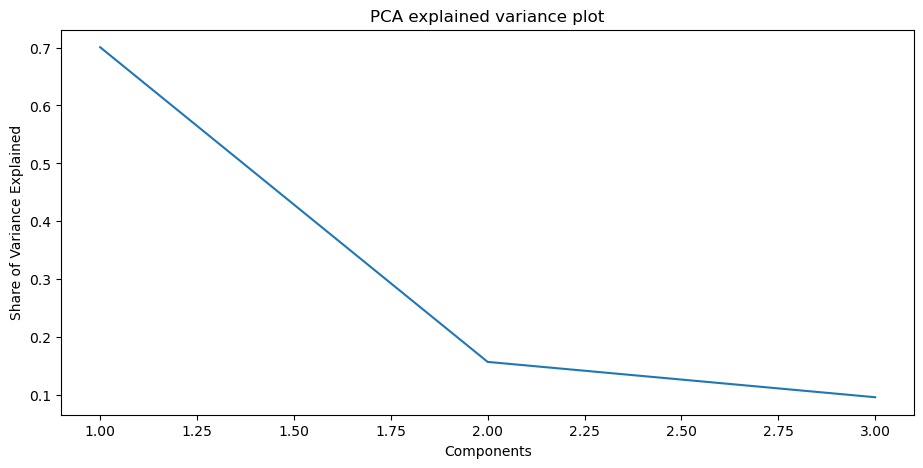

In [27]:
#create an x for each component
x = np.arange(1,len(explained_variance)+1)
#plot the results
plt.plot(x, explained_variance)

plt.title("PCA explained variance plot")
# Adding x and y labels
plt.xlabel("Components")
plt.ylabel('Share of Variance Explained')
#show the resuling plot
plt.show()

In [28]:
for i in range(0, 3):
    print(f"Component {i:>3} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component   0 accounts for 70.05% of variance
Component   1 accounts for 15.74% of variance
Component   2 accounts for 9.64% of variance


In [29]:
# Creating a dataframe from the dataset having principal components
pca_train_df = pd.DataFrame(data = X_train_pca,
                 columns = ["PC1", 
                            "PC2",
                            "PC3"
                            ])
pca_train_df=pca_train_df.reset_index(drop=True)
pca_train_df['Target']=y_train
pca_train_df


,PC1,PC2,PC3,Target
0,0.168326,0.115197,0.000055,BI
1,-0.119021,0.031507,0.035939,FG
2,-0.054392,0.016421,-0.003026,FG
3,0.080441,-0.101960,-0.076277,FG
4,0.165869,-0.055690,0.007540,PURE
...,...,...,...,...
377,0.117942,-0.049196,-0.053595,FG
378,-0.136397,0.168119,0.107982,PURE
379,-0.018299,0.058526,0.042226,FG
380,0.179626,0.061526,-0.148261,FG


In [73]:
# Converting test data to dataframe
pca_test_df = pd.DataFrame(data = X_test_pca,
                 columns = ["PC1", 
                            "PC2",
                            "PC3"
                            ])
pca_test_df=pca_test_df.reset_index(drop=True)
pca_test_df_withlabels=pca_test_df

pca_test_df_withlabels["Target"]=y_test

pca_test_df_withlabels.iloc[:,:3]

,PC1,PC2,PC3
0,0.078208,-0.040801,-0.003850
1,-0.113313,0.081735,0.063252
2,-0.152250,-0.053163,-0.007106
3,-0.171268,-0.033523,0.014930
4,0.139171,-0.027962,-0.016706
...,...,...,...
91,-0.047698,-0.012365,-0.076692
92,0.132686,-0.006133,0.039802
93,0.248039,-0.062695,0.004951
94,0.244797,0.049290,-0.021106


In [67]:
pca_test_df.iloc[0:1]

,PC1,PC2,PC3
0,0.078208,-0.040801,-0.00385


In [70]:
pca_test_df_withlabels.to_csv('pca_test.csv')

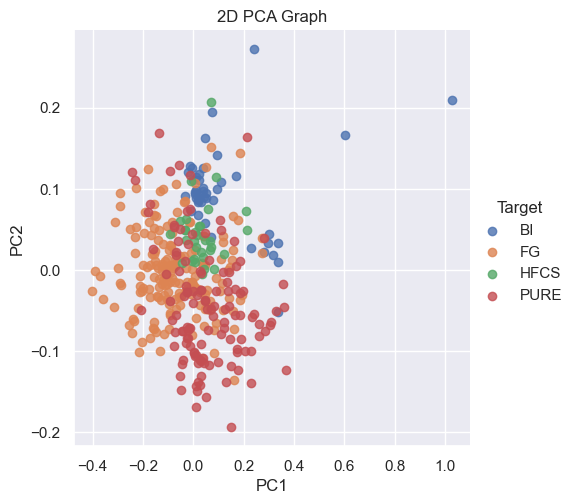

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_train_df, 
    hue='Target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [33]:
X=pca_train_df[['PC1','PC2','PC3']]
y=pca_train_df['Target']


In [64]:
# Analysis by LDA - Linear Discriminant Analysis, training model using train dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_obj = LDA()
lda_obj.fit(X, y)

X

,PC1,PC2,PC3
0,0.168326,0.115197,0.000055
1,-0.119021,0.031507,0.035939
2,-0.054392,0.016421,-0.003026
3,0.080441,-0.101960,-0.076277
4,0.165869,-0.055690,0.007540
...,...,...,...
377,0.117942,-0.049196,-0.053595
378,-0.136397,0.168119,0.107982
379,-0.018299,0.058526,0.042226
380,0.179626,0.061526,-0.148261


In [ ]:
pickle.dump(lda_obj, open('PCALDA.pkl','wb'))

In [35]:
# Model is trained with training datasets, now testing the accuracy against the test dataset.
pred_honey_label=lda_obj.predict(pca_test_df)
lda_accuracy = metrics.accuracy_score(y_test, pred_honey_label)
lda_accuracy

0.7708333333333334

In [36]:
pred_honey_label[13]


'FG'

In [37]:
y_test[13]

'FG'

##### Creating Confusion Matrix:

It is a table that is used in classification problems to assess where errors in the model were made.

The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.



[[ 4  0  0  7]
 [ 1 40  4  0]
 [ 1  2  5  0]
 [ 2  5  0 25]]


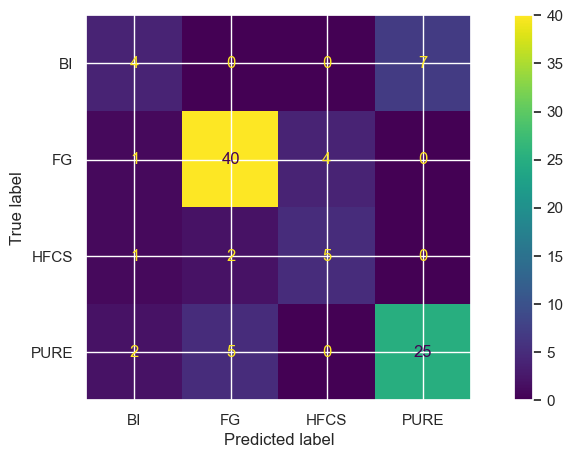

In [38]:
from sklearn import metrics 
ldaconfusion=metrics.confusion_matrix(y_test, pred_honey_label)
print(ldaconfusion)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = ldaconfusion, display_labels =['BI', 'FG', 'HFCS', 'PURE'])
cm_display.plot()
plt.show()

Now Applying QDA algorithm on the features extracted by PCA

In [39]:
X=pca_train_df[['PC1','PC2','PC3']]
y=pca_train_df['Target']



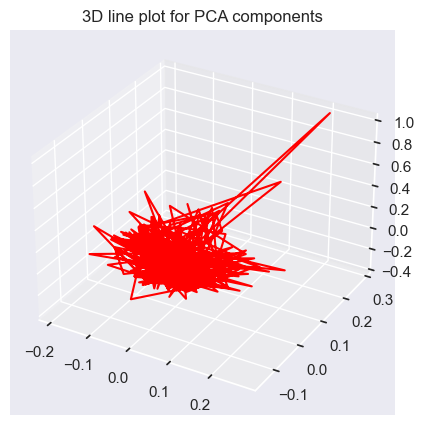

In [40]:
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z1 =   pca_train_df['PC1']
x1 =   pca_train_df['PC2']
y1 =   pca_train_df['PC3']
 
# plotting
ax.plot3D(x1, y1, z1, 'red')
ax.set_title('3D line plot for PCA components')
plt.show()

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import pickle
# from google.colab import files
qda_obj = QDA()
qda_obj.fit(X, y)
pickle.dump(qda_obj, open('PCAQDA.pkl','wb'))

# files.download('PCA_QDA.pkl')

In [47]:
qda_pred_honey=qda_obj.predict(pca_test_df)

qda_Accuracy = metrics.accuracy_score(y_test, qda_pred_honey)
qda_Accuracy

0.8541666666666666

[[ 8  0  3  0]
 [ 1 41  2  1]
 [ 0  0  8  0]
 [ 2  4  1 25]]


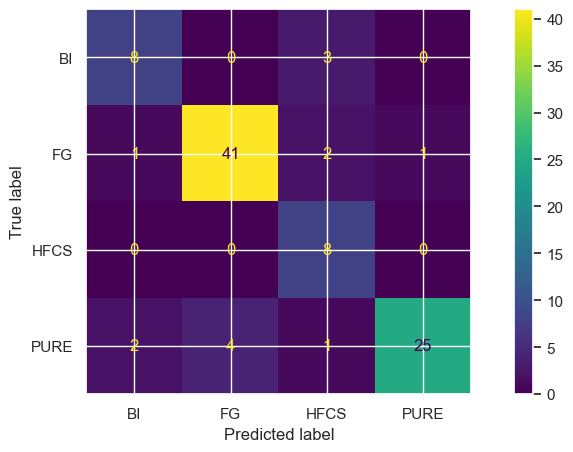

In [48]:
from sklearn import metrics 
qdaconfusion=metrics.confusion_matrix(y_test, qda_pred_honey)
print(qdaconfusion)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = qdaconfusion, display_labels =['BI', 'FG', 'HFCS', 'PURE'])
cm_display.plot()
plt.show()

Now Implementing another Dimension reduction technique - TSNE (T-Distributed Stochastic Neighbor Embedding)

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
# Seaborn for data visualization 
import seaborn as sn

In [50]:
# honeydata is original dataframe which has all the features including labels
# -> honeydata
# honey_no_labels is original dataframe which has all the features excluding labels
# -> honey_no_labels
# labels_only is the original dataset having only labels
# -> labels_only 

In [51]:
# No need to import below as already imported
#from sklearn.model_selection import train_test_split

X_sne_train, X_sne_test, y_sne_train, y_sne_test = train_test_split(honey_no_labels, labels_only,test_size=0.20,stratify=labels_only,random_state=1)

X_sne_train=X_sne_train.reset_index(drop=True)
y_sne_train=y_sne_train.reset_index(drop=True)
X_sne_test=X_sne_test.reset_index(drop=True)
y_sne_test=y_sne_test.reset_index(drop=True)

In [52]:
# Standardizing honey_no_labels data

tsne_train_std_data = StandardScaler().fit_transform(X_sne_train)
tsne_test_std_data = StandardScaler().fit_transform(X_sne_test)

# tsne_train_std_data =X_sne_train
# tsne_test_std_data = X_sne_test

In [53]:
tsne_train_std_data.shape

(382, 700)

In [54]:
tsne_test_std_data.shape

(96, 700)

In [83]:
# TSNE for Dimension Reduction

# The number of components = 3
tsne = TSNE(n_components = 3,random_state=0)

tsne_train_sne = tsne.fit_transform(tsne_train_std_data)

tsne_test_sne = tsne.fit_transform(tsne_test_std_data)
# Creating a new data frame which will
# Help us in plotting the result data

# tsne_train_sne = np.vstack((tsne_train_sne.T, y_sne_train)).T
# tsne_test_sne = np.vstack((tsne_train_sne.T, y_sne_test)).T

# tsne_train_df = pd.DataFrame(data = tsne_train_data,
# 	columns =("SNE1", "SNE2","SNE3", "Label"))

# tsne_test_df = pd.DataFrame(data = tsne_test_data,
# 	columns =("SNE1", "SNE2","SNE3", "Label"))

tsne_train_df = pd.DataFrame(data = tsne_train_sne,
	columns =("SNE1", "SNE2","SNE3"))
tsne_train_df['Label']=y_sne_train
tsne_train_df=tsne_train_df.reset_index(drop=True)

tsne_test_df = pd.DataFrame(data = tsne_test_sne,
	columns =("SNE1", "SNE2","SNE3"))
tsne_test_df=tsne_test_df.reset_index(drop=True)
tsne_test_df_withlabel=tsne_test_df
tsne_test_df_withlabel["Target"]=y_sne_test
tsne_test_df_withlabel.shape[0]

96

In [72]:
tsne_test_df_withlabel.to_csv('tsne_test.csv')

In [57]:
# Plotting the result of tsne
# sn.FacetGrid(tsne_train_df, hue ="Label", size = 6).map(
# 	plt.scatter, 'SNE1', 'SNE2').add_legend()

# plt.show()

In [58]:
X_tsne=tsne_train_df[['SNE1','SNE2','SNE3']]
y_tsne=tsne_train_df['Label']


In [59]:

# Analysis by LDA - Linear Discriminant Analysis, training model using train SNE dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_sne_obj = LDA()
lda_sne_obj.fit(X_tsne, y_tsne)

LinearDiscriminantAnalysis()

In [60]:
# Model is trained with training datasets, now testing the accuracy against the test dataset.
sne_pred_honey_label=lda_sne_obj.predict(tsne_test_df)
lda_accuracy = metrics.accuracy_score(y_sne_test, sne_pred_honey_label)
lda_accuracy

0.22916666666666666

In [75]:
sne_pred_honey_label

'PURE'

[[ 0  3  0  8]
 [ 3  4 24 14]
 [ 1  4  2  1]
 [ 4  3  9 16]]


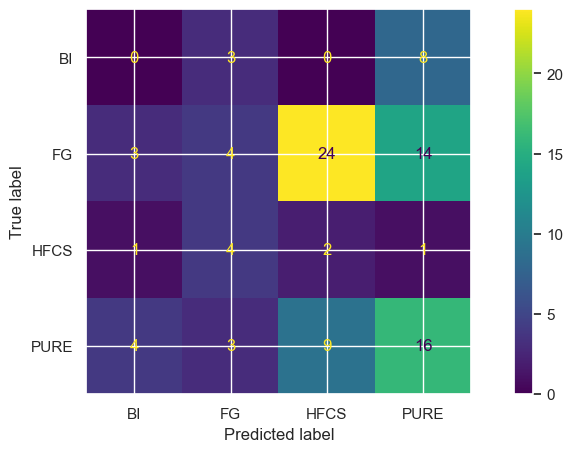

In [61]:
# Confusion Matrix
from sklearn import metrics 
ldaconfusion=metrics.confusion_matrix(y_sne_test, sne_pred_honey_label)
print(ldaconfusion)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = ldaconfusion, display_labels =['BI', 'FG', 'HFCS', 'PURE'])
cm_display.plot()
plt.show()

Now applying QDA on TSNE filterted features

In [62]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda_sne_obj = QDA()
qda_sne_obj.fit(X_tsne, y_tsne)

qsne_pred_honey_label=qda_sne_obj.predict(tsne_test_df)
qda_accuracy = metrics.accuracy_score(y_sne_test, qsne_pred_honey_label)
qda_accuracy

0.28125